<a href="https://colab.research.google.com/github/pmalu9211/ML/blob/main/4_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
plt.style.use("Solarize_Light2")

In [105]:
X,y = make_blobs(2000,2,cluster_std = 3, shuffle = False, random_state=42, centers = 2)


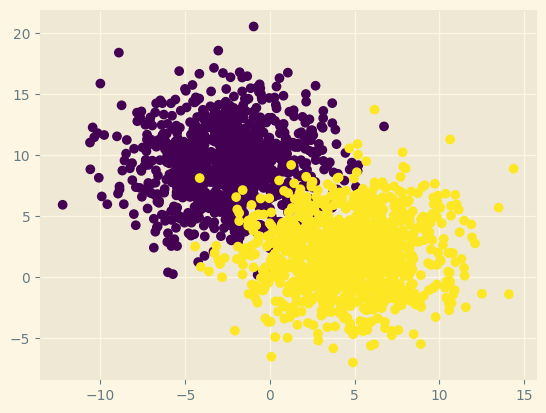

In [106]:
def visualize(X,y):
  plt.scatter(X[:,0], X[:,1], c = y)
  plt.show()
visualize(X,y)

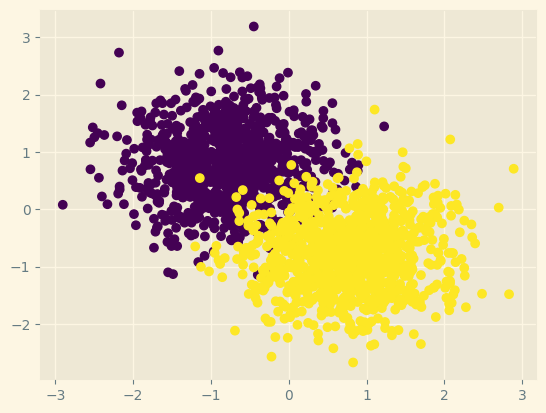

In [107]:
def normalize(X):
  return (X - X.mean(axis = 0))/X.std(axis = 0)

X = normalize(X)
visualize(X,y)

(1500, 2) (500, 2) (1500,) (500,)


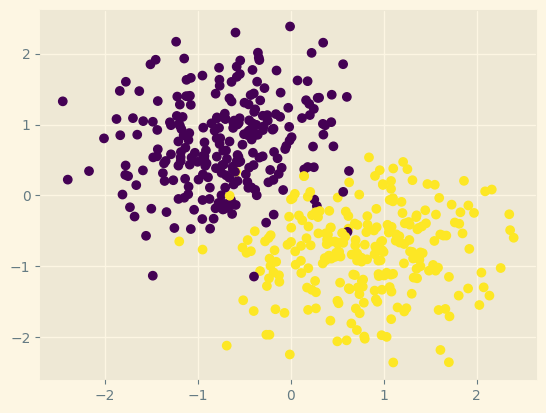

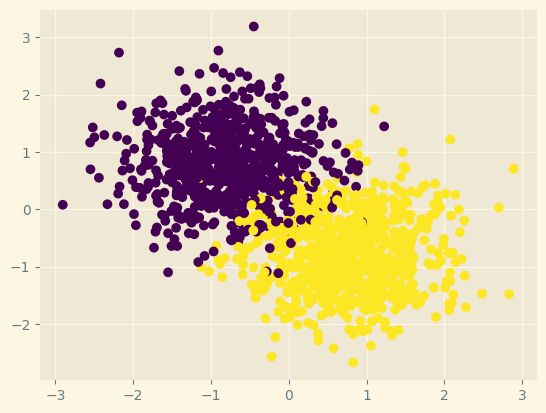

In [108]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.25, shuffle = True)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)
visualize(Xtest, ytest)
visualize(Xtrain,ytrain)

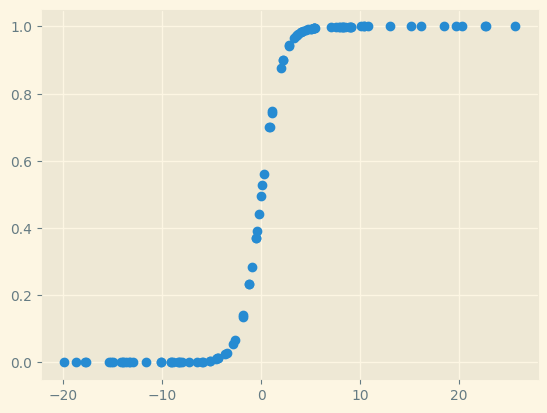

In [109]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


def hypothesis(X,theta):
  return sigmoid(np.dot(X,theta))

plotting = np.random.randn(100,)*10;
plt.scatter(plotting,sigmoid(plotting))
plt.show()

In [110]:
#loss function

def loss(y,yp):
  return -(np.mean(y*np.log(yp) + (1-y)*(np.log(1-yp))))

In [111]:
#gradient

def gradient(X,y,yp):
  m = X.shape[0]
  grad = np.dot(X.T,(y-yp))
  return (-1/m)*grad

In [112]:
def preprocessing(X):
  m = X.shape[0]
  oness = np.ones((m,1))
  X = np.hstack((oness,X))
  return X

In [132]:
def train(Xtrain, ytrain, lr = 0.5, itrn = 200):
  m = Xtrain.shape[1]
  theta = np.random.randn(m)
  err_list = []
  for i in range(itrn):
    err_list.append(loss(ytrain,hypothesis(Xtrain,theta)))
    theta = theta -lr*gradient(Xtrain, ytrain,hypothesis(Xtrain,theta))
  print(err_list)
  plt.plot(err_list)
  return theta

[0.3780605735371527, 0.348503783364538, 0.32479606642769177, 0.30539492097148613, 0.28924042922228066, 0.2755864649668402, 0.2638955515047427, 0.25377215538914283, 0.2449194677672599, 0.2371107910621621, 0.23017018984757898, 0.22395913997178057, 0.21836714079233552, 0.21330499726808064, 0.2086999340034027, 0.20449198810569888, 0.20063130914680127, 0.19707611221480276, 0.19379110772019098, 0.19074628373003216, 0.1879159521038941, 0.1852779942419985, 0.1828132594472555, 0.1805050811018821, 0.17833888462001732, 0.17630186750027882, 0.17438273647206642, 0.1725714901911339, 0.1708592385301973, 0.16923805146569645, 0.1677008320502415, 0.16624120910222745, 0.16485344612678776, 0.16353236366938892, 0.16227327284186308, 0.1610719181853866, 0.15992442837191656, 0.15882727351455214, 0.1577772280731235, 0.1567713385154197, 0.1558068950356324, 0.15488140674658485, 0.1539925798564295, 0.15313829841785168, 0.1523166073016719, 0.15152569709965702, 0.1507638907053801, 0.15002963135873468, 0.14932147197

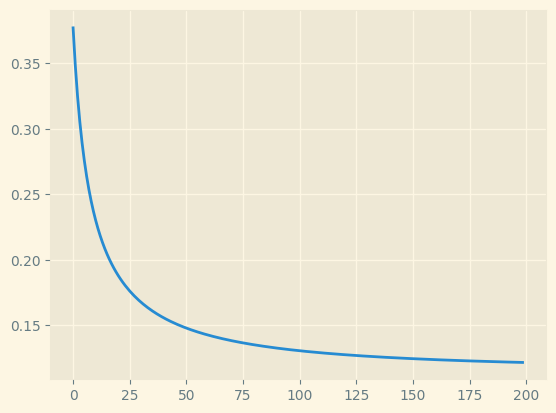

In [137]:
theta = train(preprocessing(Xtrain),ytrain)

[-3.         -2.68421053 -2.36842105 -2.05263158 -1.73684211 -1.42105263
 -1.10526316 -0.78947368 -0.47368421 -0.15789474  0.15789474  0.47368421
  0.78947368  1.10526316  1.42105263  1.73684211  2.05263158  2.36842105
  2.68421053  3.        ]


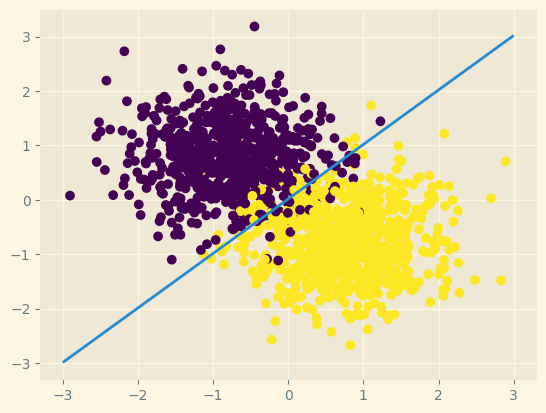

In [142]:
#visualization
plt.scatter(Xtrain[:,0], Xtrain[:,1], c = ytrain)
x1 = np.linspace(-3,3,20) #equally distributed 20 points between -3 and 3
print(x1)
x2 = -(theta[0] + theta[1]*x1)/theta[2] #calculating the points on the line for the given x1
plt.plot(x1,x2)
plt.show()

In [151]:
#prediction
def predict(X,theta):
  yp = hypothesis(X,theta)
  predicted = np.zeros(yp.shape[0], dtype='int8')
  predicted[yp >= 0.5] = 1
  return predicted

In [149]:
#accuracy
def accuracy(X,y,theta):
  preds = predict(X,theta)
  return ((np.sum(y == preds))/preds.shape[0])*100

In [154]:
#training accuracy
accuracy(preprocessing(Xtrain),ytrain,theta)

(1500,) (1500,)


95.46666666666667

In [155]:
#testing accuracy
accuracy(preprocessing(Xtest),ytest,theta)

(500,) (500,)


97.2

In [159]:
#with sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xtrain,ytrain)
# model.predict(Xtest)
model.score(Xtest,ytest)
model.score(Xtrain, ytrain)

0.956

0.9605

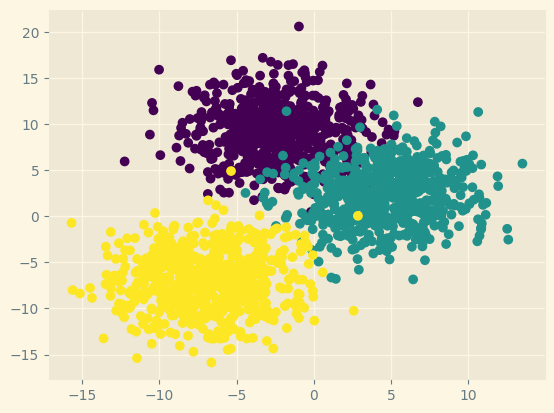

In [176]:
#multiple selection
A,b = make_blobs(2000,2,cluster_std = 3, shuffle = False, random_state=42, centers = 3) #three blobs
plt.scatter(A[:,0], A[:,1],c = b )
model = LogisticRegression(multi_class='ovr')
model.fit(A,b)
model.predict(A)
model.score(A,b)
